# Import books and transform from EPUB to a string list

In [1]:
import ebooklib
from ebooklib import epub

def epub2thtml(epub_path):
    book = epub.read_epub(epub_path)
    chapters = []
    for item in book.get_items():
        if item.get_type() == ebooklib.ITEM_DOCUMENT:
            chapters.append(item.get_content())
    return chapters

from bs4 import BeautifulSoup
blacklist = ['[document]', 'noscript', 'header', 'html', 'meta', 'head', 'input', 'script', ]
# there may be more elements you don't want, such as "style", etc.

def chap2text(chap):
    output = ''
    soup = BeautifulSoup(chap, 'html.parser')
    text = soup.find_all(text=True)
    for t in text:
        if t.parent.name not in blacklist:
            output += '{} '.format(t)
    return output

def thtml2ttext(thtml):
    Output = []
    for html in thtml:
        text =  chap2text(html)
        Output.append(text)
    return Output

def epub2text(epub_path):
    chapters = epub2thtml(epub_path)
    ttext = thtml2ttext(chapters)
    return ttext

In [2]:
harrypotter=epub2text('Harry Potter.epub')
davinci=epub2text('Da Vinci Code.epub')
clouds=epub2text('Head in the Clouds.epub')
cosmos=epub2text("Cosmos.epub")

In [3]:
#harrypotter

In [4]:
#davinci

In [5]:
#clouds

In [6]:
#cosmos

# Data structuring

In [8]:
import pandas as pd
import re

harrypotter_text = ''
for o in harrypotter:
    harrypotter_text = harrypotter_text + o
    
harrypotter_lines = harrypotter_text.splitlines()
harrypotter_df = pd.DataFrame({
    "content": harrypotter_lines,
    "line": list(range(len(harrypotter_lines)))
})
harrypotter_df

,content,line
0,,0
1,,1
2,,2
3,,3
4,HP 4 - Harry Potter and The Goblet of Fire,4
...,...,...
6764,"Har­ry winked at them, turned to Un­cle...",6764
6765,"As Ha­grid had said, what would come, w...",6765
6766,,6766
6767,,6767


In [9]:
davinci_text = ''
for o in davinci:
    davinci_text = davinci_text + o
    
davinci_lines = davinci_text.splitlines()
davinci_df = pd.DataFrame({
    "content": davinci_lines,
    "line": list(range(len(davinci_lines)))
})
davinci_df

,content,line
0,,0
1,The Da Vinci Code,1
2,Dan Brown,2
3,,3
4,FOR BLYTHE... AGAIN. MORE THAN EVER.,4
...,...,...
5887,,5887
5888,,5888
5889,,5889
5890,,5890


In [10]:
clouds_text = ''
for o in clouds:
    clouds_text = clouds_text + o
    
clouds_lines = clouds_text.splitlines()
clouds_df = pd.DataFrame({
    "content": clouds_lines,
    "line": list(range(len(clouds_lines)))
})
clouds_df

,content,line
0,,0
1,Head,1
2,IN THE,2
3,Clouds,3
4,,4
...,...,...
266,,266
267,,267
268,,268
269,,269


In [11]:
cosmos_text = ''
for o in cosmos:
    cosmos_text = cosmos_text + o
    
cosmos_lines = cosmos_text.splitlines()
cosmos_df = pd.DataFrame({
    "content": cosmos_lines,
    "line": list(range(len(cosmos_lines)))
})
cosmos_df

,content,line
0,ACKNOWLEDGMENTS,0
1,"Besides those thanked in the introduction, I ...",1
2,,2
3,By Carl Sagan Published by The Random House P...,3
4,,4
...,...,...
1703,,1703
1704,,1704
1705,,1705
1706,,1706


In [12]:
def line_is_chapter_harrypotter(dataframe):
    chapter_list = []
    curr_chapter = 0
    for index, row in dataframe.iterrows():
        if re.search("^CHAPTER ONE|TWO|THREE|FOUR|FIVE|SIX|SEVEN|EIGHT|NINE|TEN|ELEVEN|TWELVE|.*TEEN|TWENTY\-?[A-Z]*|THIRTY\-?[A-Z]*", row['content']):
            curr_chapter += 1
        chapter_list.append(curr_chapter)
    return chapter_list

curr_chapter = 0
harrypotter_df = harrypotter_df.assign(chapter = line_is_chapter_harrypotter(harrypotter_df))
harrypotter_df

,content,line,chapter
0,,0,0
1,,1,0
2,,2,0
3,,3,0
4,HP 4 - Harry Potter and The Goblet of Fire,4,0
...,...,...,...
6764,"Har­ry winked at them, turned to Un­cle...",6764,37
6765,"As Ha­grid had said, what would come, w...",6765,37
6766,,6766,37
6767,,6767,37


In [13]:
def line_is_chapter_davinci(dataframe):
    chapter_list = []
    curr_chapter = 0
    for index, row in dataframe.iterrows():
        if re.search("Prologue|Epilogue|CHAPTER [\d]+|HOUSE", row['content']):
            curr_chapter += 1
        chapter_list.append(curr_chapter)
    return chapter_list

curr_chapter = 0
davinci_df = davinci_df.assign(chapter = line_is_chapter_davinci(davinci_df))
davinci_df

,content,line,chapter
0,,0,0
1,The Da Vinci Code,1,0
2,Dan Brown,2,0
3,,3,0
4,FOR BLYTHE... AGAIN. MORE THAN EVER.,4,0
...,...,...,...
5887,,5887,109
5888,,5888,109
5889,,5889,109
5890,,5890,109


In [14]:
def line_is_chapter_clouds(dataframe):
    chapter_list = []
    curr_chapter = 0
    for index, row in dataframe.iterrows():
        if re.search("^Prologue|Chapter [\d]+|About the Author", row['content']):
            curr_chapter += 1
        chapter_list.append(curr_chapter)
    return chapter_list

curr_chapter = 0
clouds_df = clouds_df.assign(chapter = line_is_chapter_clouds(clouds_df))
clouds_df = clouds_df[0:257]
clouds_df

,content,line,chapter
0,,0,0
1,Head,1,0
2,IN THE,2,0
3,Clouds,3,0
4,,4,0
...,...,...,...
252,,252,44
253,Chapter 44 O NE MONTH LATER China cups clink...,253,45
254,,254,45
255,,255,45


In [15]:
def line_is_chapter_cosmos(dataframe):
    chapter_list = []
    curr_chapter = 0
    for index, row in dataframe.iterrows():
        if re.search("CHAPTER [IVX]+|Chapter V", row['content']):
            curr_chapter += 1
        chapter_list.append(curr_chapter)
    return chapter_list

curr_chapter = 0
cosmos_df = cosmos_df.assign(chapter = line_is_chapter_cosmos(cosmos_df))
cosmos_df

,content,line,chapter
0,ACKNOWLEDGMENTS,0,0
1,"Besides those thanked in the introduction, I ...",1,0
2,,2,0
3,By Carl Sagan Published by The Random House P...,3,0
4,,4,0
...,...,...,...
1703,,1703,13
1704,,1704,13
1705,,1705,13
1706,,1706,13


# Data cleaning 

In [16]:
from tidytext import unnest_tokens
import nltk
from nltk.corpus import stopwords
from siuba import *

punctuation_signs = ["\'", "_", "''", "``", "'", "`", '\"', ',', '.', '!', '?', '/', '[', ']', '(',')', '“', '”', '’', '‘', '-', ':', ';']

In [17]:
harrypotter_df = (unnest_tokens(harrypotter_df, "word", "content"))
harrypotter_df = harrypotter_df.reset_index()
harrypotter_df = harrypotter_df.drop(columns=['index'])

harrypotter_words = count(harrypotter_df, _.chapter, _.word, sort=True)
harrypotter_df = filter(harrypotter_df, ~_.word.isin(stopwords.words('english')))
harrypotter_df = filter(harrypotter_df,~_.word.isin(punctuation_signs))

harrypotter_df = harrypotter_df[harrypotter_df.word.notnull()]
harrypotter_df = harrypotter_df.reset_index()
harrypotter_df = harrypotter_df.drop(columns=['index'])
harrypotter_df

,line,chapter,word
0,4,0,hp
1,4,0,4
2,4,0,harry
3,4,0,potter
4,4,0,goblet
...,...,...,...
106828,6765,37,come
106829,6765,37,would
106830,6765,37,come…and
106831,6765,37,would


In [18]:
davinci_df = (unnest_tokens(davinci_df, "word", "content"))
davinci_df = davinci_df.reset_index()
davinci_df = davinci_df.drop(columns=['index'])

davinci_words = count(davinci_df, _.chapter, _.word, sort=True)
davinci_df = filter(davinci_df, ~_.word.isin(stopwords.words('english')))
davinci_df = filter(davinci_df,~_.word.isin(punctuation_signs))

davinci_df = davinci_df[davinci_df.word.notnull()]
davinci_df = davinci_df.reset_index()
davinci_df = davinci_df.drop(columns=['index'])
davinci_df

,line,chapter,word
0,1,0,da
1,1,0,vinci
2,1,0,code
3,2,0,dan
4,2,0,brown
...,...,...,...
77617,5883,109,2003
77618,5883,109,dan
77619,5883,109,brown
77620,5884,109,isbn


In [19]:
clouds_df = (unnest_tokens(clouds_df, "word", "content"))
clouds_df = clouds_df.reset_index()
clouds_df = clouds_df.drop(columns=['index'])

clouds_words = count(clouds_df, _.chapter, _.word, sort=True)
clouds_df = filter(clouds_df, ~_.word.isin(stopwords.words('english')))
clouds_df = filter(clouds_df,~_.word.isin(punctuation_signs))

clouds_df = clouds_df[clouds_df.word.notnull()]
clouds_df = clouds_df.reset_index()
clouds_df = clouds_df.drop(columns=['index'])
clouds_df

,line,chapter,word
0,1,0,head
1,3,0,clouds
2,8,0,books
3,8,0,karen
4,8,0,witemeyer
...,...,...,...
51944,253,45,always
51945,253,45,clear
51946,253,45,could
51947,253,45,always


In [20]:
cosmos_df = (unnest_tokens(cosmos_df, "word", "content"))
cosmos_df = cosmos_df.reset_index()
cosmos_df = cosmos_df.drop(columns=['index'])

cosmos_words = count(cosmos_df, _.chapter, _.word, sort=True)
cosmos_df = filter(cosmos_df, ~_.word.isin(stopwords.words('english')))
cosmos_df = filter(cosmos_df,~_.word.isin(punctuation_signs))

cosmos_df = cosmos_df[cosmos_df.word.notnull()]
cosmos_df = cosmos_df.reset_index()
cosmos_df = cosmos_df.drop(columns=['index'])
cosmos_df

,line,chapter,word
0,0,0,acknowledgments
1,1,0,besides
2,1,0,thanked
3,1,0,introduction
4,1,0,grateful
...,...,...,...
70404,1696,13,2
70405,1696,13,five
70406,1696,13,pythagorean
70407,1696,13,solids


# Bigrams

In [22]:
from nltk import *

harrypotter_bigrams_generator = ngrams(word_tokenize(harrypotter_text.lower()), 2)
harrypotter_bigrams = [ ' '.join(grams) for grams in harrypotter_bigrams_generator]

harrypotter_bi_df = pd.DataFrame({
    "book": "Harry Potter",
    "bigrams": harrypotter_bigrams,
})

davinci_bigrams_generator = ngrams(word_tokenize(davinci_text.lower()), 2)
davinci_bigrams = [ ' '.join(grams) for grams in davinci_bigrams_generator]

davinci_bi_df = pd.DataFrame({
    "book": "Da Vinci Code",
    "bigrams": davinci_bigrams,
})

clouds_bigrams_generator = ngrams(word_tokenize(clouds_text.lower()), 2)
clouds_bigrams = [ ' '.join(grams) for grams in clouds_bigrams_generator]

clouds_bi_df = pd.DataFrame({
    "book": "Head in the Clouds",
    "bigrams": clouds_bigrams,
})

cosmos_bigrams_generator = ngrams(word_tokenize(cosmos_text.lower()), 2)
cosmos_bigrams = [ ' '.join(grams) for grams in cosmos_bigrams_generator]

cosmos_bi_df = pd.DataFrame({
    "book": "Cosmos",
    "bigrams": cosmos_bigrams,
})

In [23]:
remove_words = []
remove_words.extend(stopwords.words('english'))
remove_words.extend(punctuation_signs)

#add here the list of custom words from lab 2 
custom_stop_words = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]
additional_stop_words = ["hp", "1", "2", "3", "4", "5", "6", "7", "8", "9", "0"]

remove_words.extend(custom_stop_words)
remove_words.extend(additional_stop_words)
remove_words.append("'s")

Check occurences of 'harry' vs 'harry potter'

In [24]:
harry_count = count(harrypotter_df, _.chapter, _.word, sort=True)
#harry_count = harry_count.sort_values(['chapter', 'n'], ascending=[1, 0])

harry_count

,chapter,word,n
0,31,har­ry,158
1,26,har­ry,154
2,28,har­ry,148
3,23,har­ry,141
4,20,har­ry,140
...,...,...,...
47670,20,busy,1
47671,20,bush,1
47672,20,burst,1
47673,20,burned,1


In [25]:
harrypotter_bi_df[['word1', 'word2']] = harrypotter_bi_df['bigrams'].str.split(expand=True)

harrypotter_df_clean = harrypotter_bi_df[~harrypotter_bi_df.word1.isin(remove_words)]
harrypotter_df_clean = harrypotter_df_clean[~harrypotter_df_clean.word2.isin(remove_words)]

harrypotter_df_clean = count(harrypotter_df_clean, _.book, _.bigrams, sort=True)

harrypotter_df_clean[['word1', 'word2']] = harrypotter_df_clean['bigrams'].str.split(expand=True)

harrypotter_df_clean =  harrypotter_df_clean.head(10)
harrypotter_df_clean

,book,bigrams,n,word1,word2
0,Harry Potter,mr. weasley,205,mr.,weasley
1,Harry Potter,mr. crouch,140,mr.,crouch
2,Harry Potter,mrs. weasley,132,mrs.,weasley
3,Harry Potter,madame maxime,91,madame,maxime
4,Harry Potter,pro­fes­sor mcg­ona­gall,83,pro­fes­sor,mcg­ona­gall
5,Harry Potter,har­ry pot­ter,83,har­ry,pot­ter
6,Harry Potter,un­cle ver­non,80,un­cle,ver­non
7,Harry Potter,ri­ta skeeter,77,ri­ta,skeeter
8,Harry Potter,great hall,61,great,hall
9,Harry Potter,death eaters,59,death,eaters


Graph for Da Vinci Code

In [26]:
davinci_bi_df[['word1', 'word2']] = davinci_bi_df['bigrams'].str.split(expand=True)

davinci_df_clean = davinci_bi_df[~davinci_bi_df.word1.isin(remove_words)]
davinci_df_clean = davinci_df_clean[~davinci_df_clean.word2.isin(remove_words)]

davinci_df_clean = count(davinci_df_clean, _.book, _.bigrams, sort=True)

davinci_df_clean[['word1', 'word2']] = davinci_df_clean['bigrams'].str.split(expand=True)

davinci_df_clean =  davinci_df_clean.head(30)
davinci_df_clean

,book,bigrams,n,word1,word2
0,Da Vinci Code,da vinci,124,da,vinci
1,Da Vinci Code,holy grail,119,holy,grail
2,Da Vinci Code,opus dei,86,opus,dei
3,Da Vinci Code,robert langdon,63,robert,langdon
4,Da Vinci Code,mary magdalene,59,mary,magdalene
5,Da Vinci Code,jacques saunière,58,jacques,saunière
6,Da Vinci Code,mona lisa,55,mona,lisa
7,Da Vinci Code,langdon felt,55,langdon,felt
8,Da Vinci Code,sophie neveu,49,sophie,neveu
9,Da Vinci Code,mr. langdon,46,mr.,langdon


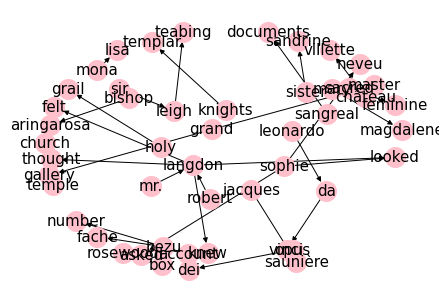

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(df=davinci_df_clean, source='word1', target='word2', edge_attr='n', create_using=nx.DiGraph())

nx.draw(G, pos=nx.spring_layout(G, k=2, iterations=220), node_size=400, font_size=15, node_color='pink', edge_color='black', with_labels=True)
#plt.savefig('plotgraph_dir.png', dpi=300, bbox_inches='tight')
plt.show()

# Trigrams

In [28]:
harrypotter_trigrams_generator = ngrams(word_tokenize(harrypotter_text.lower()), 3)
harrypotter_trigrams = [ ' '.join(grams) for grams in harrypotter_trigrams_generator]
harrypotter_tri_df = pd.DataFrame({
    "book": "Harry Potter",
    "trigrams": harrypotter_trigrams,

})

davinci_trigrams_generator = ngrams(word_tokenize(davinci_text.lower()), 3)
davinci_trigrams = [ ' '.join(grams) for grams in davinci_trigrams_generator]
davinci_tri_df = pd.DataFrame({
    "book": "Da Vinci Code",
    "trigrams": davinci_trigrams,

})

clouds_trigrams_generator = ngrams(word_tokenize(clouds_text.lower()), 3)
clouds_trigrams = [ ' '.join(grams) for grams in clouds_trigrams_generator]
clouds_tri_df = pd.DataFrame({
    "book": "Head in the Clouds",
    "trigrams": clouds_trigrams,

})

cosmos_trigrams_generator = ngrams(word_tokenize(cosmos_text.lower()), 3)
cosmos_trigrams = [ ' '.join(grams) for grams in cosmos_trigrams_generator]
cosmos_tri_df = pd.DataFrame({
    "book": "Cosmos",
    "trigrams": cosmos_trigrams,

})

Make a book list with all books and a graph for each of the books with 10 most frequent trigrams

In [29]:
books_trigram_list = [harrypotter_tri_df, davinci_tri_df, clouds_tri_df, cosmos_tri_df]
books_tri_df = pd.concat(books_trigram_list)
books_tri_df

,book,trigrams
0,Harry Potter,hp 4 -
1,Harry Potter,4 - harry
2,Harry Potter,- harry potter
3,Harry Potter,harry potter and
4,Harry Potter,potter and the
...,...,...
149623,Cosmos,the five pythagorean
149624,Cosmos,five pythagorean solids
149625,Cosmos,pythagorean solids for
149626,Cosmos,solids for further


In [30]:
books_tri_df[['word1', 'word2', 'word3']] = books_tri_df['trigrams'].str.split(expand=True)
books_tri_df

,book,trigrams,word1,word2,word3
0,Harry Potter,hp 4 -,hp,4,-
1,Harry Potter,4 - harry,4,-,harry
2,Harry Potter,- harry potter,-,harry,potter
3,Harry Potter,harry potter and,harry,potter,and
4,Harry Potter,potter and the,potter,and,the
...,...,...,...,...,...
149623,Cosmos,the five pythagorean,the,five,pythagorean
149624,Cosmos,five pythagorean solids,five,pythagorean,solids
149625,Cosmos,pythagorean solids for,pythagorean,solids,for
149626,Cosmos,solids for further,solids,for,further


In [31]:
books_tri_df = books_tri_df[~books_tri_df.word1.isin(remove_words)]
books_tri_df = books_tri_df[~books_tri_df.word2.isin(remove_words)]
books_tri_df = books_tri_df[~books_tri_df.word3.isin(remove_words)]
books_tri_df

,book,trigrams,word1,word2,word3
9,Harry Potter,fire har­ry pot­ter,fire,har­ry,pot­ter
10,Harry Potter,har­ry pot­ter har­ry,har­ry,pot­ter,har­ry
11,Harry Potter,pot­ter har­ry pot­ter,pot­ter,har­ry,pot­ter
12,Harry Potter,har­ry pot­ter &,har­ry,pot­ter,&
89,Harry Potter,ivy spread­ing unchecked,ivy,spread­ing,unchecked
...,...,...,...,...,...
149575,Cosmos,night viii travels,night,viii,travels
149597,Cosmos,memory xii encyclopaedia,memory,xii,encyclopaedia
149598,Cosmos,xii encyclopaedia galactica,xii,encyclopaedia,galactica
149599,Cosmos,encyclopaedia galactica xiii,encyclopaedia,galactica,xiii


In [32]:
books_tri_count = count(books_tri_df, _.book, _.trigrams, sort=True)
books_tri_count.head(15)

,book,trigrams,n
0,Da Vinci Code,leonardo da vinci,23
1,Da Vinci Code,sir leigh teabing,20
2,Cosmos,government printing office,17
3,Cosmos,u.s. government printing,17
4,Da Vinci Code,find robert langdon,15
5,Cosmos,billion years ago,14
6,Harry Potter,near­ly head­less nick,13
7,Da Vinci Code,salle des etats,13
8,Da Vinci Code,sir isaac newton,11
9,Cosmos,reductio ad absurdum,8


In [33]:
graph_books = ungroup(group_by(arrange(books_tri_count, -_.n), 'book').head(10))

ordered_graph = arrange(graph_books, _.book, -_.n)
#ordered_graph

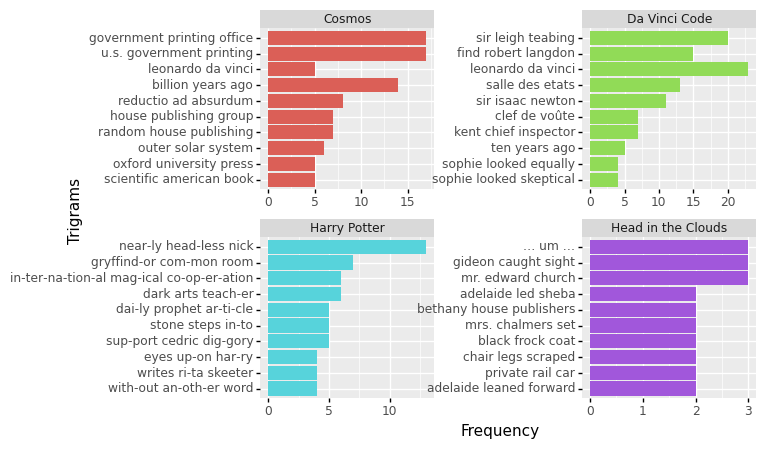

<ggplot: (-9223371905323670104)>

In [34]:
from plotnine import *
from siuba.dply.forcats import fct_lump, fct_reorder

ggplot(ordered_graph) + aes(x=fct_reorder(ordered_graph['trigrams'], x=ordered_graph['n']), y='n', fill='book') + coord_flip() + geom_col(show_legend = False) + facet_wrap('~book', ncol = 2, scales = "free") + labs(x = "Trigrams", y = "Frequency") + theme(subplots_adjust={'wspace': 0.15}) + theme(subplots_adjust={'wspace': 0.85, 'hspace': 0.3}) + scale_x_discrete()

# N-Grams

Check repentance of ideea in scientific book

In [35]:
cosmos_ngrams_generator = ngrams(word_tokenize(cosmos_text.lower()), 5)
cosmos_ngrams = [ ' '.join(grams) for grams in cosmos_ngrams_generator]
cosmos_n_df = pd.DataFrame({
    "book": "Cosmos",
    "ngrams": cosmos_ngrams,

})

cosmos_n_df[['word1', 'word2', 'word3', 'word4', 'word5']] = cosmos_n_df['ngrams'].str.split(expand=True)

cosmos_n_df = cosmos_n_df[~cosmos_n_df.word1.isin(remove_words)]
cosmos_n_df = cosmos_n_df[~cosmos_n_df.word2.isin(remove_words)]
cosmos_n_df = cosmos_n_df[~cosmos_n_df.word3.isin(remove_words)]
cosmos_n_df = cosmos_n_df[~cosmos_n_df.word4.isin(remove_words)]
cosmos_n_df = cosmos_n_df[~cosmos_n_df.word5.isin(remove_words)]

cosmos_count = count(cosmos_n_df, _.book, _.ngrams, sort=True)
cosmos_count

,book,ngrams,n
0,Cosmos,* * * mammals characteristically,1
1,Cosmos,pleasingly long—about 59 earth days,1
2,Cosmos,ohio state university annual award,1
3,Cosmos,orbiters surveyed candidate landing sites,1
4,Cosmos,organic molecules called carl sagan,1
...,...,...,...
201,Cosmos,extraterrestrial radio signals encompassing mi...,1
202,Cosmos,extremely dangerous high-energy charged particles,1
203,Cosmos,extremely small stacked plates tapering,1
204,Cosmos,fairly simple mathematical laws pervade,1


# Sentiment analisys

In [36]:
from matplotlib import pyplot as plt
from afinn import Afinn
afinn = Afinn()

In [37]:
#print(afinn.score(davinci_text))
print(afinn.score(clouds_text))

1092.0


In [38]:
harrypotter_scores = [afinn.score(word) for word in harrypotter_df['word']]
harrypotter_df = harrypotter_df.assign(word_score = harrypotter_scores)
summarized_harrypotter = summarize(group_by(harrypotter_df, 'chapter'), chapter_score =_.word_score.sum())
#summarized_harrypotter

davinci_scores = [afinn.score(word) for word in davinci_df['word']]
davinci_df = davinci_df.assign(word_score = davinci_scores)
summarized_davinci = summarize(group_by(davinci_df, 'chapter'), chapter_score =_.word_score.sum())
#summarized_davinci

clouds_scores = [afinn.score(word) for word in clouds_df['word']]
clouds_df = clouds_df.assign(word_score = clouds_scores)
summarized_clouds = summarize(group_by(clouds_df, 'chapter'), chapter_score =_.word_score.sum())
#summarized_clouds

cosmos_scores = [afinn.score(word) for word in cosmos_df['word']]
cosmos_df = cosmos_df.assign(word_score = cosmos_scores)
summarized_cosmos = summarize(group_by(cosmos_df, 'chapter'), chapter_score =_.word_score.sum())
#summarized_cosmos

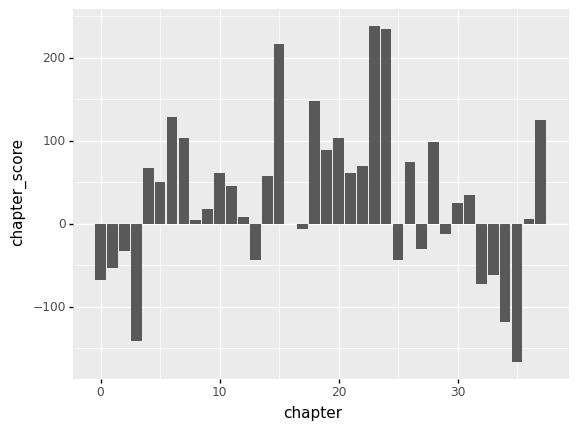

<ggplot: (-9223371905356023060)>

In [39]:
(ggplot(summarized_harrypotter) # defining what data to use
+ aes(x='chapter', y='chapter_score') # defining what variable to use
+ geom_bar(stat='identity') # defining the type of plot to use
)

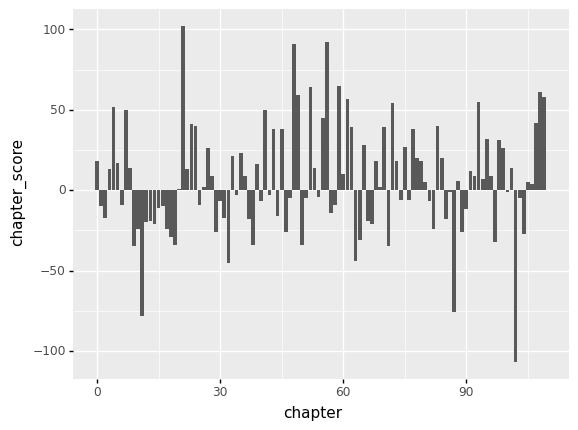

<ggplot: (-9223371905356638944)>

In [40]:
(ggplot(summarized_davinci) # defining what data to use
+ aes(x='chapter', y='chapter_score') # defining what variable to use
+ geom_bar(stat='identity') # defining the type of plot to use
)

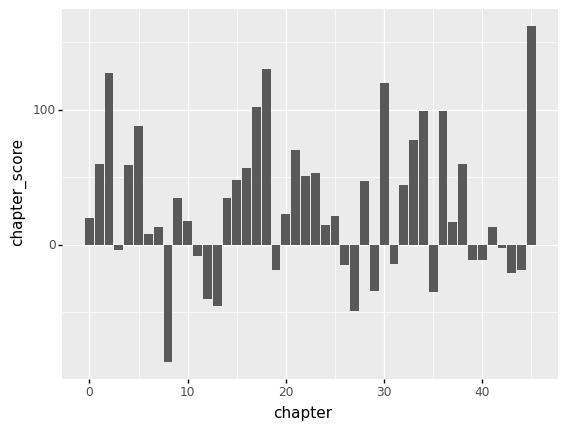

<ggplot: (-9223371905348272612)>

In [41]:
(ggplot(summarized_clouds) # defining what data to use
+ aes(x='chapter', y='chapter_score') # defining what variable to use
+ geom_bar(stat='identity') # defining the type of plot to use
)

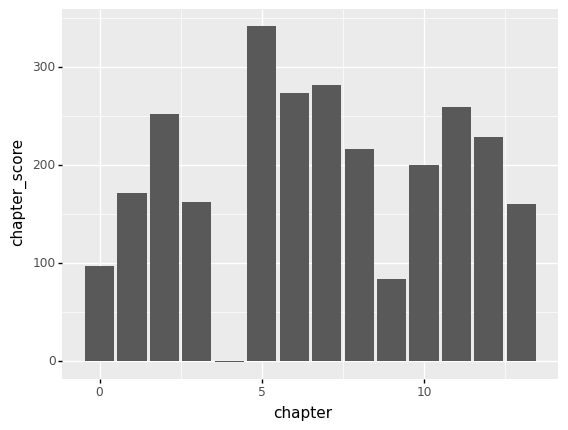

<ggplot: (-9223371905355508828)>

In [42]:
(ggplot(summarized_cosmos) # defining what data to use
+ aes(x='chapter', y='chapter_score') # defining what variable to use
+ geom_bar(stat='identity') # defining the type of plot to use
)

In [43]:
from nrclex import NRCLex

harrypotter_text_object = NRCLex(harrypotter_text)
davinci_text_object = NRCLex(davinci_text)
clouds_text_object = NRCLex(clouds_text)
cosmos_text_object = NRCLex(cosmos_text)

In [44]:
harrypotter_text_object.top_emotions

[('negative', 0.18904887165997508)]

In [45]:
harrypotter_test_per_chapter = harrypotter_df.groupby('chapter').agg({'line':'first',
'word': ', '.join,
'word_score':'first' }).reset_index()

davinci_test_per_chapter = davinci_df.groupby('chapter').agg({'line':'first',
'word': ', '.join,
'word_score':'first' }).reset_index()

clouds_test_per_chapter = clouds_df.groupby('chapter').agg({'line':'first',
'word': ', '.join,
'word_score':'first' }).reset_index()

cosmos_test_per_chapter = cosmos_df.groupby('chapter').agg({'line':'first',
'word': ', '.join,
'word_score':'first' }).reset_index()


Antonyms 

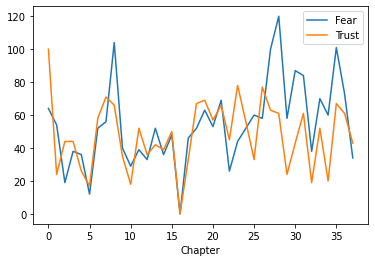

In [46]:
my_fear_list = [NRCLex(elem).raw_emotion_scores['fear'] if 'fear' in
NRCLex(elem).raw_emotion_scores else 0 for elem in harrypotter_test_per_chapter['word']]

my_trust_list = [NRCLex(elem).raw_emotion_scores['trust'] if 'trust' in
NRCLex(elem).raw_emotion_scores else 0 for elem in harrypotter_test_per_chapter['word']]

plt.plot(my_fear_list)
plt.plot(my_trust_list)
plt.xlabel('Chapter')


plt.legend(["Fear", "Trust"])

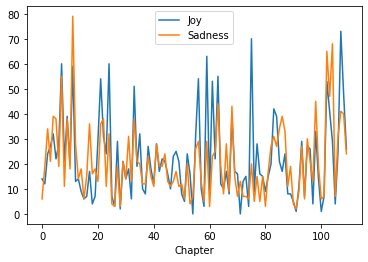

In [47]:
my_joy_list = [NRCLex(elem).raw_emotion_scores['joy'] if 'joy' in
NRCLex(elem).raw_emotion_scores else 0 for elem in davinci_test_per_chapter['word']]

my_sadness_list = [NRCLex(elem).raw_emotion_scores['sadness'] if 'sadness' in
NRCLex(elem).raw_emotion_scores else 0 for elem in davinci_test_per_chapter['word']]

plt.plot(my_joy_list)
plt.plot(my_sadness_list)
plt.xlabel('Chapter')


plt.legend(["Joy", "Sadness"])

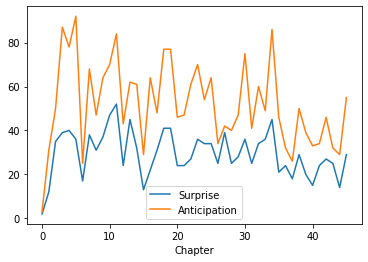

In [48]:
my_surprise_list = [NRCLex(elem).raw_emotion_scores['surprise'] if 'surprise' in
NRCLex(elem).raw_emotion_scores else 0 for elem in clouds_test_per_chapter['word']]

my_anticipation_list = [NRCLex(elem).raw_emotion_scores['anticipation'] if 'anticipation' in
NRCLex(elem).raw_emotion_scores else 0 for elem in clouds_test_per_chapter['word']]

plt.plot(my_surprise_list)
plt.plot(my_anticipation_list)
plt.xlabel('Chapter')


plt.legend(["Surprise", "Anticipation"])

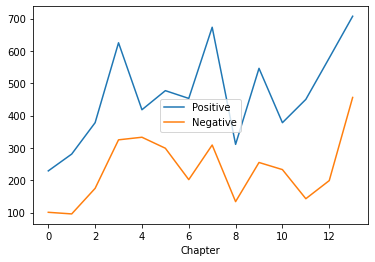

In [49]:
my_positive_list = [NRCLex(elem).raw_emotion_scores['positive'] if 'positive' in
NRCLex(elem).raw_emotion_scores else 0 for elem in cosmos_test_per_chapter['word']]

my_negative_list = [NRCLex(elem).raw_emotion_scores['negative'] if 'negative' in
NRCLex(elem).raw_emotion_scores else 0 for elem in cosmos_test_per_chapter['word']]

plt.plot(my_positive_list)
plt.plot(my_negative_list)
plt.xlabel('Chapter')


plt.legend(["Positive", "Negative"])

In [50]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
scores = sia.polarity_scores('Yay')
scores

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Renata\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5267}

In [51]:
clouds_nltk = ['positive' if sia.polarity_scores(word)['compound'] > 0 else 'negative' if sia.polarity_scores(word)['compound'] < 0 else 'neutral' for word in clouds_df['word']]

sentiment_clouds_df = clouds_df.assign(nltk_sentiment = clouds_nltk)
sentiment_clouds_df

,line,chapter,word,word_score,nltk_sentiment
0,1,0,head,0.0,neutral
1,3,0,clouds,0.0,neutral
2,8,0,books,0.0,neutral
3,8,0,karen,0.0,neutral
4,8,0,witemeyer,0.0,neutral
...,...,...,...,...,...
51944,253,45,always,0.0,neutral
51945,253,45,clear,1.0,positive
51946,253,45,could,0.0,neutral
51947,253,45,always,0.0,neutral


In [52]:
test_df = count(sentiment_clouds_df, 'chapter', 'nltk_sentiment')
test_df

,chapter,nltk_sentiment,n
0,0,negative,1
1,0,neutral,129
2,0,positive,12
3,1,negative,25
4,1,neutral,529
...,...,...,...
133,44,neutral,679
134,44,positive,41
135,45,negative,36
136,45,neutral,1013


In [53]:
test_df_sentiment = test_df.groupby(test_df.nltk_sentiment).sum().reset_index()
del test_df_sentiment['chapter']
test_df_sentiment

,nltk_sentiment,n
0,negative,3063
1,neutral,44222
2,positive,4664


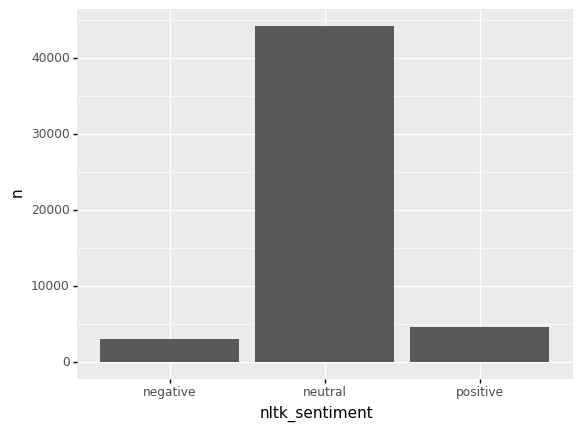

<ggplot: (-9223371905324604856)>

In [54]:
(ggplot(test_df_sentiment)
+ aes(x='nltk_sentiment', y='n')
+ geom_col()
)

# Word Clouds

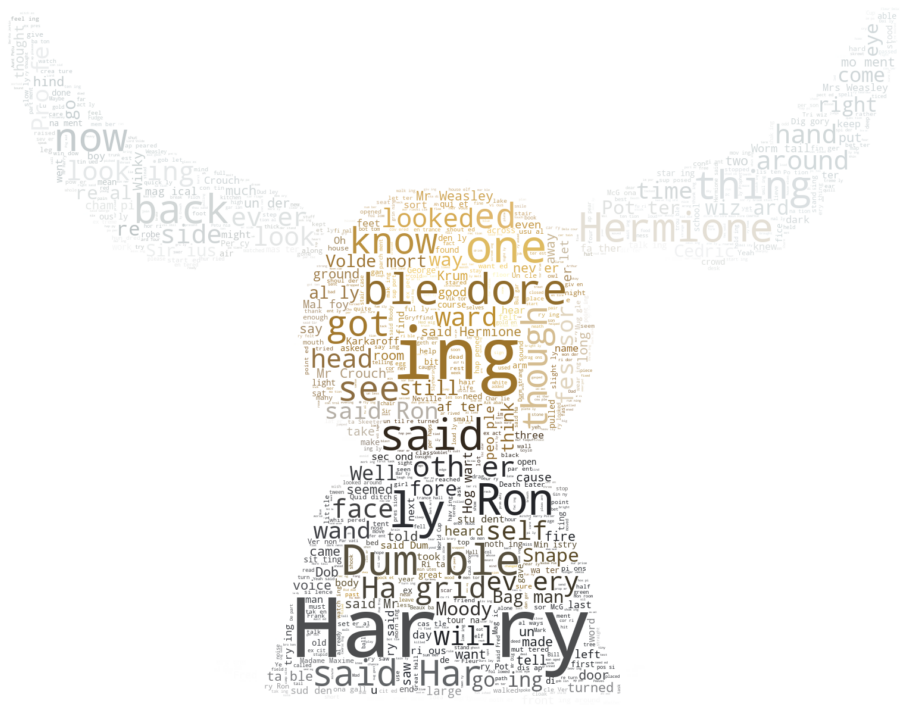

In [56]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image

#Create the mask
clouds_mask = np.array(Image.open("harrypotter2.png"))

clouds2_mask = np.array(Image.open("harrypotter2.png"))
color_mask = ImageColorGenerator(clouds2_mask)

wordcloud = WordCloud(background_color="white", mode="RGBA", max_words=1000, max_font_size=1000, mask=clouds_mask).generate(harrypotter_text)
# create coloring from image
plt.figure(figsize=[16,16])
plt.imshow(wordcloud.recolor(color_func=color_mask), interpolation="bilinear")
plt.axis("off")
plt.show()

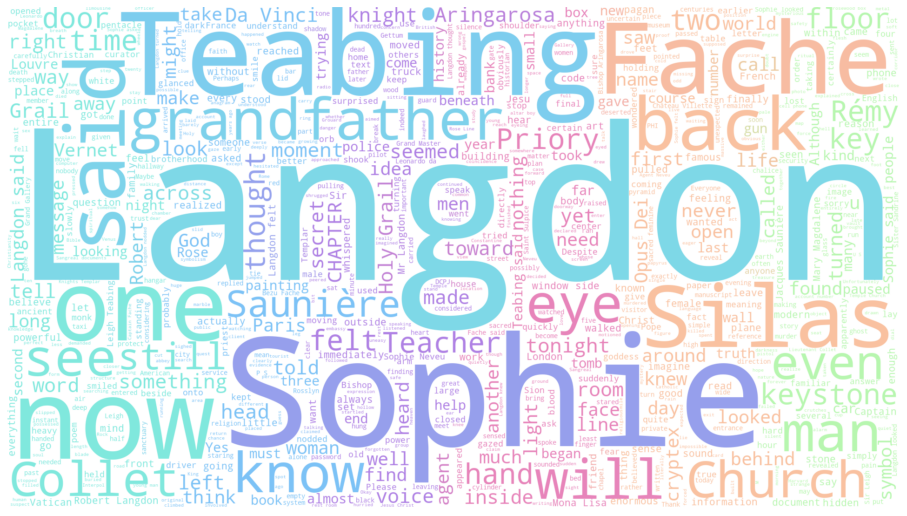

In [57]:
#Create the mask
clouds_mask = np.array(Image.open("cosmos2.png"))

clouds2_mask = np.array(Image.open("cosmos2.png"))
color_mask = ImageColorGenerator(clouds2_mask)

wordcloud = WordCloud(background_color="white", mode="RGBA", max_words=800, max_font_size=500, mask=clouds_mask).generate(davinci_text)
# create coloring from image
plt.figure(figsize=[16,16])
plt.imshow(wordcloud.recolor(color_func=color_mask), interpolation="bilinear")
plt.axis("off")
plt.show()

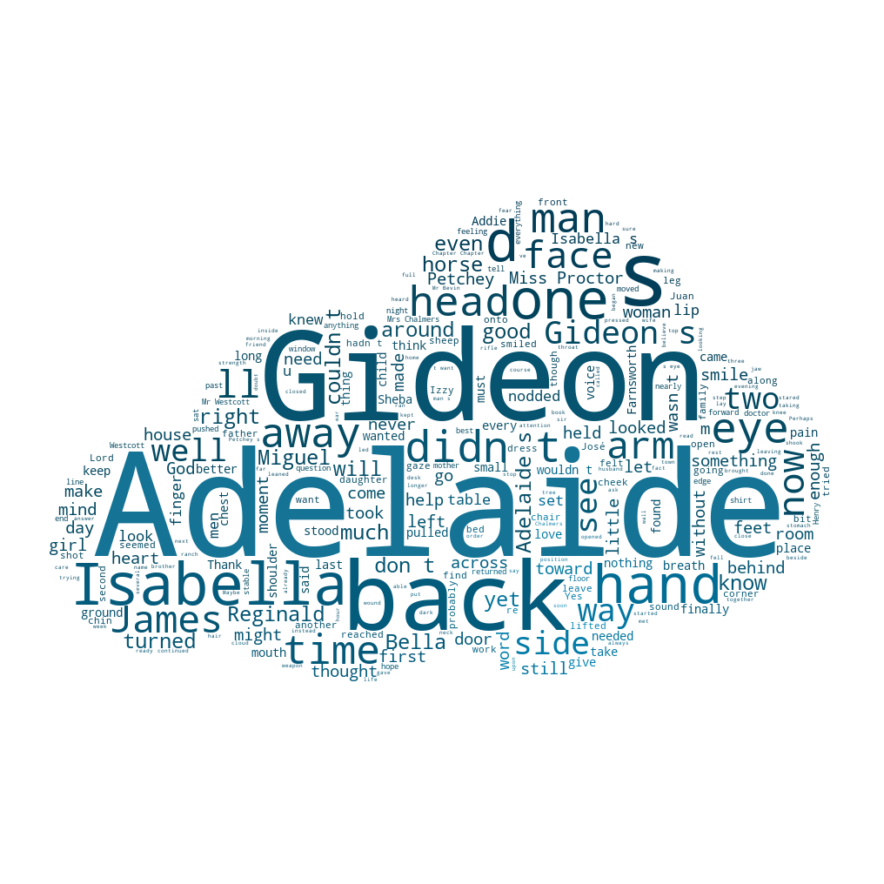

In [58]:
#Create the mask
clouds_mask = np.array(Image.open("clouds.png"))

clouds2_mask = np.array(Image.open("cloudss.png"))
color_mask = ImageColorGenerator(clouds2_mask)

wordcloud = WordCloud(background_color="white", mode="RGBA", max_words=300, max_font_size=500, mask=clouds_mask).generate(clouds_text)
# create coloring from image
plt.figure(figsize=[16,16])
plt.imshow(wordcloud.recolor(color_func=color_mask), interpolation="bilinear")
plt.axis("off")
plt.show()

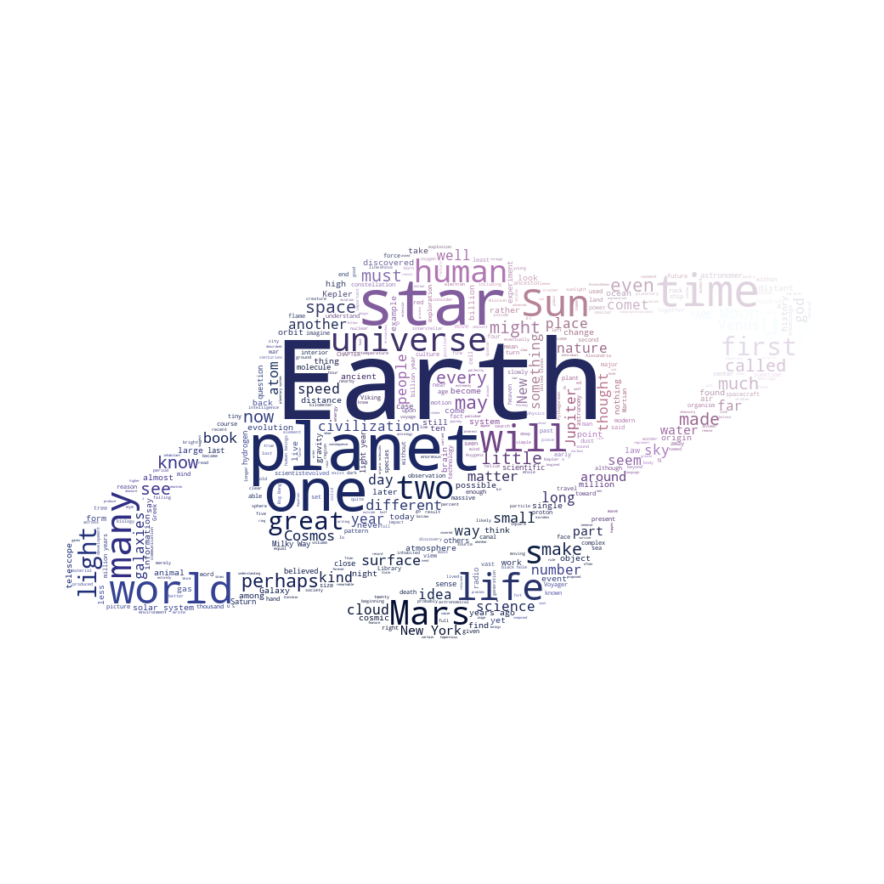

In [59]:
#Create the mask
cosmos_mask = np.array(Image.open("cosmos.png"))

cosmos2_mask = np.array(Image.open("cosmoss.png"))
color_mask = ImageColorGenerator(cosmos2_mask)

wordcloud = WordCloud(background_color="white", mode="RGBA", max_words=500, max_font_size=500, mask=cosmos_mask).generate(cosmos_text)
# create coloring from image
plt.figure(figsize=[16,16])
plt.imshow(wordcloud.recolor(color_func=color_mask), interpolation="bilinear")
plt.axis("off")
plt.show()

In [60]:
custom_stop_words = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]
harrypotter_words = count(harrypotter_df, _.word, sort=True)
harrypotter_words = filter(harrypotter_words,~_.word.isin(custom_stop_words))
harrypotter_words= filter(harrypotter_words,~_.word.isin(punctuation_signs))

harrypotter_words = harrypotter_words.reset_index()
harrypotter_words = harrypotter_words.drop(columns=['index'])


cosmos_words = count(cosmos_df, _.word, sort=True)
cosmos_words = filter(cosmos_words,~_.word.isin(custom_stop_words))
cosmos_words= filter(cosmos_words,~_.word.isin(punctuation_signs))

davinci_words = count(davinci_df, _.word, sort=True)
davinci_words = filter(davinci_words,~_.word.isin(custom_stop_words))
davinci_words= filter(davinci_words,~_.word.isin(punctuation_signs))


clouds_words = count(clouds_df, _.word, sort=True)
clouds_words = filter(clouds_words,~_.word.isin(custom_stop_words))
clouds_words= filter(clouds_words,~_.word.isin(punctuation_signs))


In [61]:
from siuba.dply.forcats import fct_lump, fct_reorder
from plotnine import *

head_count=count(filter(clouds_df, _.word.isin(['head'])),_.word)
clouds_count=count(filter(clouds_df, _.word.isin(['clouds'])),_.word)
clouds_count
clouds_words_count = pd.concat([head_count,clouds_count,clouds_words[:10]])
clouds_words_count = arrange(clouds_words_count, -_.n)
clouds_words_count = clouds_words_count.reset_index()
clouds_words_count = clouds_words_count.drop(columns=['index'])


cosmos_count=count(filter(cosmos_df, _.word.isin(['cosmos'])),_.word)
cosmos_count
cosmos_words_count = pd.concat([cosmos_count,cosmos_words[:10]])
cosmos_words_count = arrange(cosmos_words_count, -_.n)
cosmos_words_count = cosmos_words_count.reset_index()
cosmos_words_count = cosmos_words_count.drop(columns=['index'])


vinci_count=count(filter(davinci_df, _.word.isin(['vinci'])),_.word)
code_count=count(filter(davinci_df, _.word.isin(['code'])),_.word)
code_count
davinci_words_count = pd.concat([vinci_count,code_count,davinci_words[:10]])
davinci_words_count = arrange(davinci_words_count, -_.n)
davinci_words_count = davinci_words_count.reset_index()
davinci_words_count = davinci_words_count.drop(columns=['index'])

harry_count=count(filter(harrypotter_df, _.word.isin(['harry', 'har­ry'])))
potter_count=count(filter(harrypotter_df, _.word.isin(['potter'])),_.word)
potter_count
harrypotter_words = filter(harrypotter_words, ~_.word.isin(['harry', 'har­ry']))
                                               
harrypotter_words_count = pd.concat([harry_count,potter_count,harrypotter_words[:10]])
harrypotter_words_count = arrange(harrypotter_words_count, -_.n)
harrypotter_words_count = harrypotter_words_count.reset_index()
harrypotter_words_count = harrypotter_words_count.drop(columns=['index'])
harrypotter_words_count['word'] = harrypotter_words_count['word'].replace(np.nan, 'harry')

harrypotter_words_count

,n,word
0,2918,harry
1,974,ron
2,823,hermione
3,692,in­to
4,519,dum­ble­dore
5,483,looked
6,366,weasley
7,323,look­ing
8,321,ha­grid
9,315,eyes


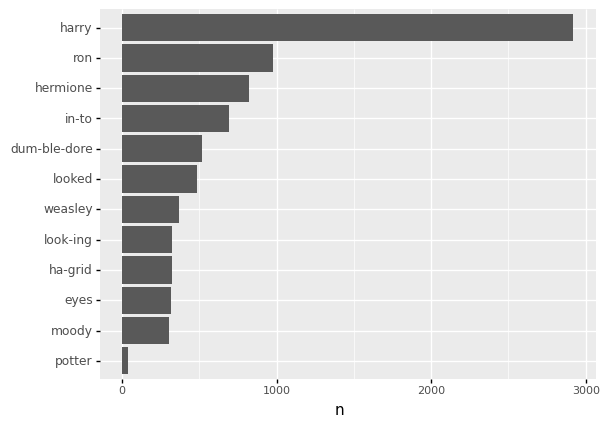

<ggplot: (-9223371905436448840)>

In [62]:
from siuba.dply.forcats import fct_lump, fct_reorder
ggplot(harrypotter_words_count) + aes(x=fct_reorder(harrypotter_words_count['word'], x=harrypotter_words_count['n']), y='n') + coord_flip() + geom_col(show_legend = False) + theme(subplots_adjust={'wspace': 0.35, 'hspace': 0.4})+theme(axis_text_x = element_text(size=8))

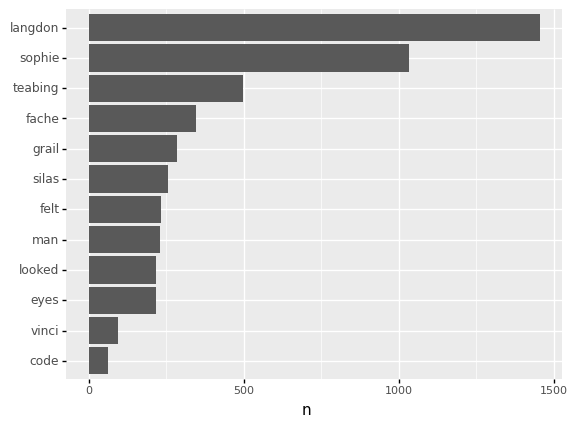

<ggplot: (-9223371905324063836)>

In [63]:
ggplot(davinci_words_count) + aes(x=fct_reorder(davinci_words_count['word'], x=davinci_words_count['n']), y='n') + coord_flip() + geom_col(show_legend = False) + theme(subplots_adjust={'wspace': 0.35, 'hspace': 0.4})+theme(axis_text_x = element_text(size=8))

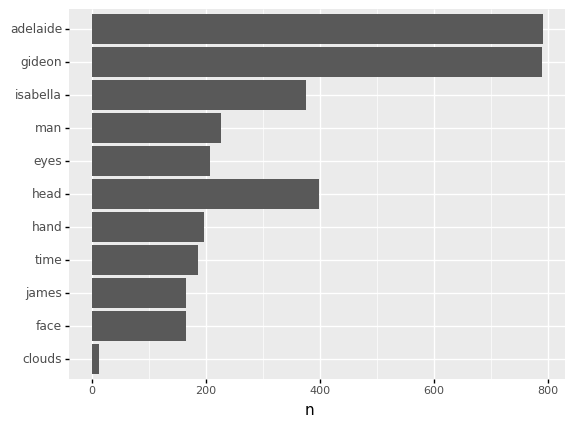

<ggplot: (-9223371905436444312)>

In [64]:
ggplot(clouds_words_count) + aes(x=fct_reorder(clouds_words_count['word'], x=clouds_words_count['n']), y='n') + coord_flip() + geom_col(show_legend = False) + theme(subplots_adjust={'wspace': 0.35, 'hspace': 0.4})+theme(axis_text_x = element_text(size=8))

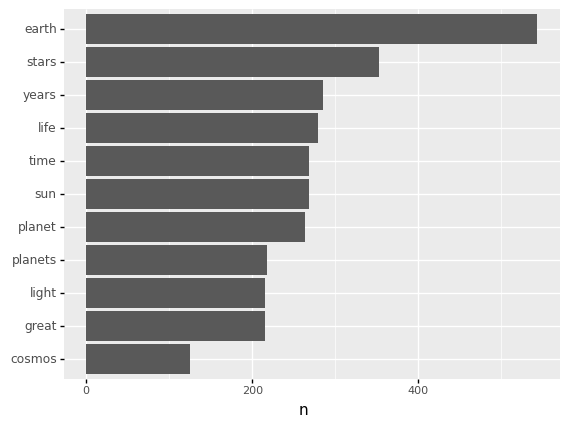

<ggplot: (-9223371905323868540)>

In [65]:
ggplot(cosmos_words_count) + aes(x=fct_reorder(cosmos_words_count['word'], x=cosmos_words_count['n']), y='n') + coord_flip() + geom_col(show_legend = False) + theme(subplots_adjust={'wspace': 0.35, 'hspace': 0.4})+theme(axis_text_x = element_text(size=8))